In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.__version__
import sys
sys.path.insert(0, r'D:\Python27x64\Lib\site-packages\sompy')
import sompy as SOM
import numpy as np
%matplotlib inline

In [2]:
import matplotlib as mpl
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

D:\Python27x64\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
qtls_NDVI = np.array([ 0.11,  0.16,  0.18,  0.21,  0.23,  0.28,  0.35,  0.47,  0.64])
qtls_TRMM = np.array([1.99,   3.18,   5.02,   7.96,  13.34,  22.47,  36.94,  58.43,  94.4])
qtls_LST = np.array([13.2,   13.6,   13.96,  14.34,  14.66,  14.89,  15.06,  15.23,  15.44])

qtls_NDVI_lst = qtls_NDVI.tolist()
qtls_NDVI_lst.insert(0,' ')
qtls_NDVI_lst.append(' ')

qtls_TRMM_lst = qtls_TRMM.tolist()
qtls_TRMM_lst.insert(0,' ')
qtls_TRMM_lst.append(' ')  

qtls_LST_lst = qtls_LST.tolist()
qtls_LST_lst.insert(0,' ')
qtls_LST_lst.append(' ')

In [4]:
df_allyears_raw = pd.read_csv(r'D:\Downloads\Mattijn@Jia\png\trial_7\pd_DataFrames_csv//df_allyears_raw.csv', 
                                index_col=0, parse_dates=True)
df_allyears_class = pd.read_csv(r'D:\Downloads\Mattijn@Jia\png\trial_7\pd_DataFrames_csv//df_allyears_class.csv', 
                                index_col=0, parse_dates=True)
df_avgmonth_allyears = pd.read_csv(r'D:\Downloads\Mattijn@Jia\png\trial_7\pd_DataFrames_csv//df_avgmonth_allyears.csv',
                                   index_col=0, parse_dates=True)
df_allyears_anomalies = pd.read_csv(r'D:\Downloads\Mattijn@Jia\png\trial_7\pd_DataFrames_csv//df_allyears_anomalies.csv',
                                    index_col=0, parse_dates=True)

In [5]:
#df_allyears_class.groupby(lambda x: x.year)

In [6]:
a = df_avgmonth_allyears['NDVI']
b = df_avgmonth_allyears['CHIRP']
c = df_avgmonth_allyears['LST']

In [7]:
# df_allyears_anomalies = pd.DataFrame()

# a = df_avgmonth_allyears['NDVI']
# b = df_avgmonth_allyears['CHIRP']
# c = df_avgmonth_allyears['LST']

# # group classified data by year so we can plot the anomalies for each year
# df_allyears_class_grouped = df_allyears_class.groupby(lambda x: x.year)
# for year, ysel_class in df_allyears_class_grouped:
#     print year,    
#     x = ysel_class['NDVI']
#     y = ysel_class['CHIRP']
#     z = ysel_class['LST']    
    
#     d = {'NDVI' : pd.Series(x.as_matrix() - a.as_matrix(), index=x.index),
#          'CHIRP': pd.Series(y.as_matrix() - b.as_matrix(), index=y.index),
#          'LST'  : pd.Series(z.as_matrix() - c.as_matrix(), index=z.index)}    
#     df_anomalies = pd.DataFrame(d)
    
#     df_allyears_anomalies = df_allyears_anomalies.append(df_anomalies)   

In [8]:
# df_allyears_anomalies.to_csv(r'D:\Downloads\Mattijn@Jia\png\trial_7\pd_DataFrames_csv//df_allyears_anomalies.csv')

In [9]:
month = df_allyears_anomalies.index.map(lambda x: x.month)
# df_ay_anom_gs = df_allyears_anomalies_growseason
df_ay_anom_gs = df_allyears_anomalies[(month>=5)& (month <=10)]
df_ay_class_gs = df_allyears_class[(month>=5)& (month <=10)]

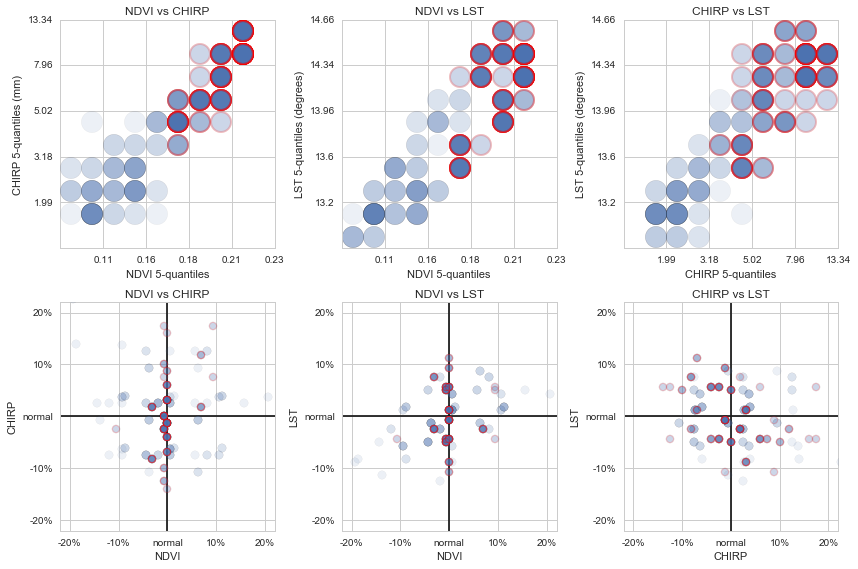

In [10]:
NPOINTS = len(a)
MAP='viridis' # choose carefully, or color transitions will not appear smoooth

x = df_avgmonth_allyears['NDVI']
y = df_avgmonth_allyears['CHIRP']
z = df_avgmonth_allyears['LST']

cm = plt.get_cmap(MAP)

fig = plt.figure(figsize=(12,8))
# --- # --- # --- # --- # --- # ax1 # --- # --- # --- # --- # --- #
ax1 = plt.subplot(231)
ax1.scatter(df_allyears_class.NDVI,df_allyears_class.CHIRP, alpha=0.1, s=450,zorder=3)
ax1.scatter(df_ay_class_gs.NDVI,df_ay_class_gs.CHIRP,alpha=0.2, s=400, facecolor=None,edgecolor='red', lw=2,zorder=3)
#ax1.set_color_cycle([cm(1.*i/(NPOINTS-1)) for i in range(NPOINTS-1)])
#for i in range(NPOINTS-1):
#    ax1.plot(a[i:i+2],b[i:i+2],zorder=2, lw=3)
#ax1.scatter(a,b,c=np.linspace(0,1,NPOINTS), s=40,zorder=4)

ax1.xaxis.set_ticklabels(qtls_NDVI_lst)
ax1.xaxis.set_label_text('NDVI 5-quantiles')
ax1.set_xlim(0,5)
ax1.yaxis.set_ticklabels(qtls_TRMM_lst)
ax1.yaxis.set_label_text('CHIRP 5-quantiles (mm)')
ax1.set_ylim(0,5)
ax1.grid(True)
ax1.set_title('NDVI vs CHIRP')
# --- # --- # --- # --- # --- # ax2 # --- # --- # --- # --- # --- #
ax2 = plt.subplot(232)
ax2.scatter(df_allyears_class.NDVI,df_allyears_class.LST, alpha=0.1, s=450)
ax2.scatter(df_ay_class_gs.NDVI,df_ay_class_gs.LST,alpha=0.2, s=400, facecolor=None,edgecolor='red', lw=2,zorder=3)
ax2.xaxis.set_ticklabels(qtls_NDVI_lst)
ax2.xaxis.set_label_text('NDVI 5-quantiles')
ax2.set_xlim(0,5)
ax2.yaxis.set_ticklabels(qtls_LST_lst)
ax2.yaxis.set_label_text('LST 5-quantiles (degrees)')
ax2.set_ylim(0,5)
ax2.grid(True)
ax2.set_title('NDVI vs LST')
# --- # --- # --- # --- # --- # ax3 # --- # --- # --- # --- # --- #
ax3 = plt.subplot(233)
ax3.scatter(df_allyears_class.CHIRP,df_allyears_class.LST, alpha=0.1, s=450,zorder=3)
ax3.scatter(df_ay_class_gs.CHIRP,df_ay_class_gs.LST,alpha=0.2, s=400, facecolor=None,edgecolor='red', lw=2,zorder=3)
ax3.yaxis.set_ticklabels(qtls_LST_lst)
ax3.yaxis.set_label_text('LST 5-quantiles (degrees)')
ax3.set_ylim(0,5)
ax3.xaxis.set_ticklabels(qtls_TRMM_lst)
ax3.xaxis.set_label_text('CHIRP 5-quantiles')
ax3.set_xlim(0,5)
ax3.grid(True)
ax3.set_title('CHIRP vs LST')

# --- # --- # --- # --- # --- # ax4 # --- # --- # --- # --- # --- #
ax1 = plt.subplot(234)
# plot matrix
#ax1.set_color_cycle([cm(1.*i/(NPOINTS-1)) for i in range(NPOINTS-1)])
#for i in range(NPOINTS-1):
#    ax1.plot((x.as_matrix() - a.as_matrix())[i:i+2],(y.as_matrix() - b.as_matrix())[i:i+2],zorder=3)
ax1.scatter(df_allyears_anomalies.NDVI,df_allyears_anomalies.CHIRP,alpha=0.1, s=70,zorder=3)
ax1.scatter(df_ay_anom_gs.NDVI,df_ay_anom_gs.CHIRP,alpha=0.2, s=50, facecolor=None,edgecolor='red', lw=1,zorder=3)

# axes settings
ax1.set_xlim(-1.1,1.1)
ax1.set_ylim(-1.1,1.1)
ax1.vlines(0,-1.1,1.1,zorder=2)
ax1.hlines(0,-1.1,1.1,zorder=2)
ax1.xaxis.set_ticks([-1,-0.5,0,0.5,1])
ax1.yaxis.set_ticks([-1,-0.5,0,0.5,1])
ax1.xaxis.set_ticklabels(['-20%','-10%', 'normal', '10%', '20%'])
ax1.yaxis.set_ticklabels(['-20%','-10%', 'normal', '10%', '20%'])
ax1.xaxis.set_label_text('NDVI')    
ax1.yaxis.set_label_text('CHIRP')
plt.grid(True)
ax1.set_title('NDVI vs CHIRP')

# --- # --- # --- # --- # --- # ax5 # --- # --- # --- # --- # --- #
ax2 = plt.subplot(235)
# plot matrix
#ax2.set_color_cycle([cm(1.*i/(NPOINTS-1)) for i in range(NPOINTS-1)])
#for i in range(NPOINTS-1):
#    ax2.plot((x.as_matrix() - a.as_matrix())[i:i+2],(z.as_matrix() - c.as_matrix())[i:i+2],zorder=3)
ax2.scatter(df_allyears_anomalies.NDVI,df_allyears_anomalies.LST,alpha=0.1, s=70,zorder=3)
ax2.scatter(df_ay_anom_gs.NDVI,df_ay_anom_gs.LST,alpha=0.2, s=50, facecolor=None,edgecolor='red', lw=1,zorder=3)
# axes settings
ax2.set_xlim(-1.1,1.1)
ax2.set_ylim(-1.1,1.1)
ax2.vlines(0,-1.1,1.1,zorder=2)
ax2.hlines(0,-1.1,1.1,zorder=2)
ax2.xaxis.set_ticks([-1,-0.5,0,0.5,1])
ax2.yaxis.set_ticks([-1,-0.5,0,0.5,1])
ax2.xaxis.set_ticklabels(['-20%','-10%', 'normal', '10%', '20%'])
ax2.yaxis.set_ticklabels(['-20%','-10%', 'normal', '10%', '20%'])
ax2.xaxis.set_label_text('NDVI')    
ax2.yaxis.set_label_text('LST')
plt.grid(True)
ax2.set_title('NDVI vs LST')

# --- # --- # --- # --- # --- # ax6 # --- # --- # --- # --- # --- #
ax3 = plt.subplot(236)
# plot matrix
#ax3.set_color_cycle([cm(1.*i/(NPOINTS-1)) for i in range(NPOINTS-1)])
#for i in range(NPOINTS-1):
#    ax3.plot((y.as_matrix() - b.as_matrix())[i:i+2],(z.as_matrix() - c.as_matrix())[i:i+2],zorder=3)
ax3.scatter(df_allyears_anomalies.CHIRP,df_allyears_anomalies.LST,alpha=0.1, s=70,zorder=3)
ax3.scatter(df_ay_anom_gs.CHIRP,df_ay_anom_gs.LST,alpha=0.2, s=50, facecolor=None,edgecolor='red', lw=1,zorder=3)
# axes settings
ax3.set_xlim(-1.1,1.1)
ax3.set_ylim(-1.1,1.1)
ax3.vlines(0,-1.1,1.1,zorder=2)
ax3.hlines(0,-1.1,1.1,zorder=2)
ax3.xaxis.set_ticks([-1,-0.5,0,0.5,1])
ax3.yaxis.set_ticks([-1,-0.5,0,0.5,1])
ax3.xaxis.set_ticklabels(['-20%','-10%', 'normal', '10%', '20%'])
ax3.yaxis.set_ticklabels(['-20%','-10%', 'normal', '10%', '20%'])
ax3.yaxis.set_label_text('LST')    
ax3.xaxis.set_label_text('CHIRP')
plt.grid(True)
ax3.set_title('CHIRP vs LST')
plt.tight_layout()
plt.savefig(r'D:\Downloads\Mattijn@Jia\png\trial_7//distribution_anomalies_IM_2.png', dpi=200, bbox_inches='tight')

In [13]:
# classified data
Data = df_allyears_anomalies[['NDVI','CHIRP','LST']].as_matrix()
#Data = df_ay_anom_gs[['NDVI','CHIRP','LST']].as_matrix()
# raw data
#Data = df_allyears_raw[['NDVI','CHIRP','LST']].as_matrix()
import sys
sys.path.insert(0, r'D:\Python27x64\Lib\site-packages\sompy')
import sompy as SOM

In [20]:
Data = Data[0:-4] # Precip has Nan for last period of 2015

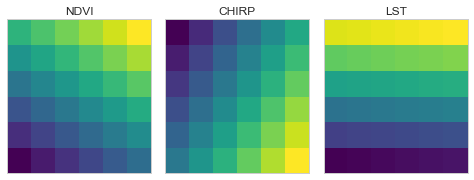

In [21]:
msz11 = 6
msz10 = 6
som1 = SOM.SOM('som1', Data, mapsize = [msz10, msz11], norm_method = 'var', initmethod='pca')
#What you get when you initialize the map with pca
som1.init_map()
som1.view_map(text_size=7, cmap='viridis', grid='Yes')

In [22]:
#What you get when you train the map
som1.train(n_job = 1, shared_memory = 'no',verbose='off')
som1.view_map(text_size=7, cmap='viridis', grid='Yes', save='Yes', save_dir=r'D:\Downloads\Mattijn@Jia\png\trial_7\SOM.png')

D:\Python27x64\lib\site-packages\numpy\core\fromnumeric.py:2499: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


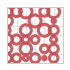

In [35]:
#hitmap
som1.hit_map()

In [23]:
#this gives the cluster label of each node
labels = som1.cluster(method='Kmeans', n_clusters=2)
som1.cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

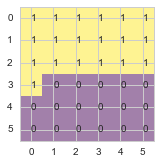

In [24]:
#if you did clusters before
cents  = som1.hit_map_cluster_number()

In [25]:
view_U_matrix()

NameError: name 'view_U_matrix' is not defined

In [26]:
som1.U_matrix()

array([[ 0.16940431,  0.16415103,  0.13830729,  0.54486362,  0.67579719,
         0.47308243],
       [ 0.35090553,  0.41677577,  0.23821321,  0.79790983,  1.42758435,
         0.95268187],
       [ 0.31775811,  0.88598957,  1.37757015,  1.562768  ,  1.46672466,
         1.04146985],
       [ 1.2375063 ,  1.59452257,  1.29299445,  0.74967844,  0.12760428,
         0.49447728],
       [ 1.57234807,  1.14145572,  0.10831768,  0.22401459,  0.11675324,
         0.21370046],
       [ 0.52881809,  0.53647703,  0.32698407,  0.25165688,  0.22635637,
         0.1750273 ]])

D:\Python27x64\Lib\site-packages\sompy\sompy.py:523: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if data == None:
D:\Python27x64\Lib\site-packages\sompy\sompy.py:531: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if data != None:


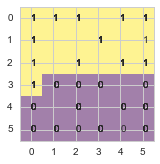

coordinates of bmus:
[[ 5  1 31]
 [ 4  0 24]
 [ 2  5 17]
 [ 1  3  9]
 [ 0  2  2]
 [ 0  0  0]
 [ 0  1  1]
 [ 2  2 14]
 [ 0  2  2]
 [ 4  2 26]
 [ 5  3 33]
 [ 5  1 31]
 [ 5  5 35]
 [ 4  0 24]
 [ 3  2 20]
 [ 5  1 31]
 [ 0  2  2]
 [ 1  3  9]
 [ 1  0  6]
 [ 0  2  2]
 [ 3  1 19]
 [ 1  3  9]
 [ 1  0  6]
 [ 0  4  4]
 [ 0  5  5]
 [ 0  5  5]
 [ 0  4  4]
 [ 0  5  5]
 [ 3  0 18]
 [ 4  2 26]
 [ 1  0  6]
 [ 2  2 14]
 [ 0  2  2]
 [ 4  2 26]
 [ 4  0 24]
 [ 1  0  6]
 [ 0  1  1]
 [ 4  0 24]
 [ 3  2 20]
 [ 2  0 12]
 [ 3  1 19]
 [ 4  2 26]
 [ 5  3 33]
 [ 5  3 33]
 [ 4  4 28]
 [ 4  2 26]
 [ 2  4 16]
 [ 4  0 24]
 [ 0  1  1]
 [ 1  3  9]
 [ 2  5 17]
 [ 3  0 18]
 [ 0  2  2]
 [ 0  0  0]
 [ 2  4 16]
 [ 2  2 14]
 [ 4  4 28]
 [ 1  3  9]
 [ 2  4 16]
 [ 0  5  5]
 [ 3  0 18]
 [ 5  2 32]
 [ 2  0 12]
 [ 3  3 21]
 [ 4  4 28]
 [ 4  2 26]
 [ 2  4 16]
 [ 2  2 14]
 [ 0  2  2]
 [ 0  0  0]
 [ 1  0  6]
 [ 1  0  6]
 [ 1  3  9]
 [ 1  5 11]
 [ 3  2 20]
 [ 5  0 30]
 [ 5  0 30]
 [ 4  2 26]
 [ 5  3 33]
 [ 2  2 14]
 [ 0  2  2]
 [ 1  3

In [27]:
#this cents is the array holding the bmu for the training data, the first two cols are x,y in SOM and third one is the node id.
cents  = som1.hit_map_cluster_number(Data)
print 'coordinates of bmus:'
print cents
som_clusters = labels[cents[:,2]]
print "cluster labels for data" ,som_clusters

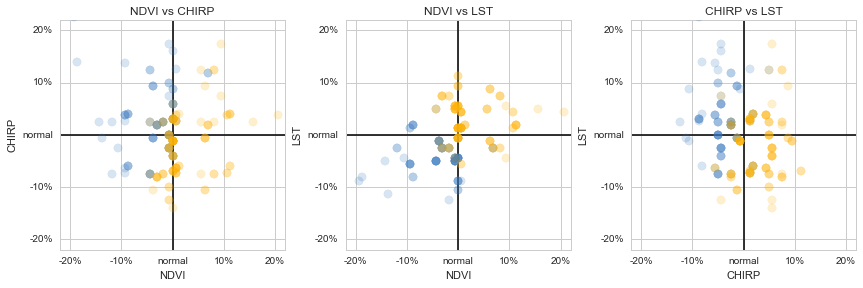

In [29]:
cluster0 = df_allyears_anomalies.ix[(som_clusters == 0)]
cluster1 = df_allyears_anomalies.ix[(som_clusters == 1)]
#cluster2 = df_allyears_anomalies.ix[(som_clusters == 2)]

colors = ["amber", "windows blue"]
fig = plt.figure(figsize=(12,4))
# --- # --- # --- # --- # --- # ax1 # --- # --- # --- # --- # --- #
ax1 = plt.subplot(131)
# plot matrix
ax1.scatter(cluster0.NDVI,cluster0.CHIRP,alpha=0.2, s=70, color=sns.xkcd_palette(colors)[1],zorder=10)
ax1.scatter(cluster1.NDVI,cluster1.CHIRP,alpha=0.2, s=70, color=sns.xkcd_palette(colors)[0],zorder=10)
#ax1.scatter(cluster2.NDVI,cluster2.CHIRP,alpha=0.2, s=70, color='g',zorder=10)
#ax1.scatter(df_ay_anom_gs.NDVI,df_ay_anom_gs.CHIRP,alpha=0.2, s=100, facecolor=None,edgecolor='red', lw=2)
# axes settings
ax1.set_xlim(-1.1,1.1)
ax1.set_ylim(-1.1,1.1)
ax1.vlines(0,-1.1,1.1,zorder=2)
ax1.hlines(0,-1.1,1.1,zorder=2)
ax1.xaxis.set_ticks([-1,-0.5,0,0.5,1])
ax1.yaxis.set_ticks([-1,-0.5,0,0.5,1])
ax1.xaxis.set_ticklabels(['-20%','-10%', 'normal', '10%', '20%'])
ax1.yaxis.set_ticklabels(['-20%','-10%', 'normal', '10%', '20%'])
ax1.xaxis.set_label_text('NDVI')    
ax1.yaxis.set_label_text('CHIRP')
ax1.grid()
ax1.set_title('NDVI vs CHIRP')
plt.grid()

# --- # --- # --- # --- # --- # ax2 # --- # --- # --- # --- # --- #
ax2 = plt.subplot(132)
# plot matrix
ax2.scatter(cluster0.NDVI,cluster0.LST,alpha=0.2, s=70, color=sns.xkcd_palette(colors)[1],zorder=10)
ax2.scatter(cluster1.NDVI,cluster1.LST,alpha=0.2, s=70, color=sns.xkcd_palette(colors)[0],zorder=10)
#ax2.scatter(cluster2.NDVI,cluster2.LST,alpha=0.2, s=70, color='g',zorder=10)
# axes settings
ax2.set_xlim(-1.1,1.1)
ax2.set_ylim(-1.1,1.1)
ax2.vlines(0,-1.1,1.1,zorder=2)
ax2.hlines(0,-1.1,1.1,zorder=2)
ax2.xaxis.set_ticks([-1,-0.5,0,0.5,1])
ax2.yaxis.set_ticks([-1,-0.5,0,0.5,1])
ax2.xaxis.set_ticklabels(['-20%','-10%', 'normal', '10%', '20%'])
ax2.yaxis.set_ticklabels(['-20%','-10%', 'normal', '10%', '20%'])
ax2.xaxis.set_label_text('NDVI')    
ax2.yaxis.set_label_text('LST')
ax2.grid()
ax2.set_title('NDVI vs LST')
plt.grid()

# --- # --- # --- # --- # --- # ax3 # --- # --- # --- # --- # --- #
ax3 = plt.subplot(133)
# plot matrix
ax3.scatter(cluster0.LST,cluster0.CHIRP,alpha=0.2, s=70, color=sns.xkcd_palette(colors)[1],zorder=10)
ax3.scatter(cluster1.LST,cluster1.CHIRP,alpha=0.2, s=70, color=sns.xkcd_palette(colors)[0],zorder=10)
#ax3.scatter(cluster2.LST,cluster2.CHIRP,alpha=0.2, s=70, color='g',zorder=10)
# axes settings
ax3.set_xlim(-1.1,1.1)
ax3.set_ylim(-1.1,1.1)
ax3.vlines(0,-1.1,1.1,zorder=2)
ax3.hlines(0,-1.1,1.1,zorder=2)
ax3.xaxis.set_ticks([-1,-0.5,0,0.5,1])
ax3.yaxis.set_ticks([-1,-0.5,0,0.5,1])
ax3.xaxis.set_ticklabels(['-20%','-10%', 'normal', '10%', '20%'])
ax3.yaxis.set_ticklabels(['-20%','-10%', 'normal', '10%', '20%'])
ax3.yaxis.set_label_text('LST')    
ax3.xaxis.set_label_text('CHIRP')
ax3.grid()
ax3.set_title('CHIRP vs LST')
plt.grid()
plt.tight_layout()
plt.savefig(r'D:\Downloads\Mattijn@Jia\png\trial_7//classfied_anomalies_IM.png', dpi=200, bbox_inches='tight')

In [40]:
# combine classified with som clusters
df_ay_class_cluster = pd.concat([df_allyears_class.reset_index(),
                                 pd.Series(som_clusters,name='cluster')], axis=1).set_index(['date'])
df_ay_class_cluster.index = df_ay_class_cluster.index.to_period(freq='M')
year = df_ay_class_cluster.index.map(lambda x: x.year)

In [ ]:
# combine raw with som clusters
df_ay_raw_cluster = pd.concat([df_allyears_raw.reset_index(),
                               pd.Series(som_clusters,name='cluster')], axis=1).set_index(['date'])
df_ay_raw_cluster.index = df_ay_raw_cluster.index.to_period(freq='M')
year = df_ay_raw_cluster.index.map(lambda x: x.year)

In [ ]:
df_ay_raw_cluster.head()

In [41]:
months_drought_cma = pd.read_excel(r'D:\Downloads\Mattijn@Jia\png\trial_5\data_dataframes_csv//months-drought-sta-box.xlsx',
                                   index_col=0,parse_dates=[[0,1]], freq='M')
months_drought_cma.index = months_drought_cma.index.to_period(freq='M')

In [42]:
# combine classified som clusters with grounth 'truth'
df_ay_class_cluster_grtruth = pd.concat([df_ay_class_cluster,months_drought_cma], axis=1, join='outer')
year_cma = df_ay_class_cluster_grtruth.index.map(lambda x: x.year)
df_ay_class_cluster_grtruth = df_ay_class_cluster_grtruth[(year_cma>=2000)]
df_ay_class_cluster_grtruth.fillna(0, inplace=True)
df_ay_class_cluster_grtruth_gs = df_ay_class_cluster_grtruth[(month>=5)& (month <=10)]

In [ ]:
# combine raw som clusters with grounth 'truth'
df_ay_raw_cluster_grtruth = pd.concat([df_ay_raw_cluster,months_drought_cma], axis=1, join='outer')
year_cma = df_ay_raw_cluster_grtruth.index.map(lambda x: x.year)
df_ay_raw_cluster_grtruth = df_ay_raw_cluster_grtruth[(year_cma>=2003)]
df_ay_raw_cluster_grtruth.fillna(0, inplace=True)
df_ay_raw_cluster_grtruth_gs = df_ay_raw_cluster_grtruth[(month>=5)& (month <=10)]

In [34]:
df_ay_class_cluster_grtruth.head()

,NDVI,CHIRP,LST,cluster,drought_stations
2000-01,0.25,1.25,0.25,0,0
2000-02,0.75,0.75,0.75,0,0
2000-03,1.75,1.75,1.75,1,0
2000-04,2.25,2.75,3.25,1,1
2000-05,3.25,3.25,4.25,1,5


In [ ]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [ ]:
tips = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')
tips.head()

In [ ]:
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, size=4);

In [38]:
df_ay_class_cluster_grtruth.sort_values(by='cluster', inplace=True)

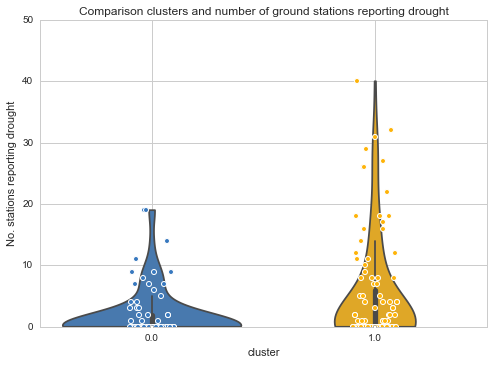

In [49]:
#f, ax = plt.subplots(figsize=(4, 5))

g = sns.violinplot(x="cluster", y="drought_stations", data=df_ay_class_cluster_grtruth, cut=0,
               bw=0.5, scale_hue=False, palette=sns.xkcd_palette(colors[::-1]))#, inner=None)
sns.stripplot(x="cluster", y="drought_stations", data=df_ay_class_cluster_grtruth, jitter=True, size=5, palette=sns.xkcd_palette(colors[::-1]))#, alpha=0.5)
g.set(ylim=(0,None),ylabel='No. stations reporting drought',title='Comparison clusters and number of ground stations reporting drought')
g.grid(True)
g.get_figure().savefig(r'D:\Downloads\Mattijn@Jia\png\trial_7//violin_plot.png', dpi=300)

In [ ]:
# plot classified som clusters with grounth 'truth'
plt.clf()
plt.scatter(df_ay_class_cluster_grtruth.cluster, df_ay_class_cluster_grtruth.drought_stations, alpha=0.2, s=40)
plt.scatter(df_ay_class_cluster_grtruth_gs.cluster, df_ay_class_cluster_grtruth_gs.drought_stations,
            alpha=0.2, s=30, facecolor='none', edgecolor='red', lw=2,zorder=3)
plt.violinplot(df_ay_class_cluster_grtruth_gs.query('cluster==0').drought_stations, positions=[0], showextrema=False,
               showmeans=True, showmedians=True, )
violin_parts = plt.violinplot(df_ay_class_cluster_grtruth_gs.query('cluster==1').drought_stations, positions=[1], showextrema=False,
               showmeans=True, showmedians=True, )
#for pc in violin_parts['bodies']:
#    pc.set_facecolor('c')
#    pc.set_edgecolor('black')
plt.xticks([0,1])
plt.grid(zorder=1, axis='y')
plt.ylabel('No. stations')
plt.xlabel('SOM cluster')
plt.title('Number of stations affected by drought vs its assigned cluster')
#plt.savefig(r'D:\Downloads\Mattijn@Jia\png\trial_5//stations_cluster_IM2.png', dpi=200, bbox_inches='tight')

In [ ]:
# plot raw som clusters with grounth 'truth'
plt.clf()
plt.scatter(df_ay_raw_cluster_grtruth.cluster, df_ay_raw_cluster_grtruth.drought_stations, alpha=0.2, s=40)
plt.scatter(df_ay_raw_cluster_grtruth_gs.cluster, df_ay_raw_cluster_grtruth_gs.drought_stations,
            alpha=0.2, s=30, facecolor='none', edgecolor='red', lw=2,zorder=3)
plt.violinplot(df_ay_raw_cluster_grtruth_gs.query('cluster==0').drought_stations, positions=[0], showextrema=False,
               showmeans=True, showmedians=True, )
violin_parts = plt.violinplot(df_ay_raw_cluster_grtruth_gs.query('cluster==1').drought_stations, positions=[1], showextrema=False,
               showmeans=True, showmedians=True, )
#for pc in violin_parts['bodies']:
#    pc.set_facecolor('c')
#    pc.set_edgecolor('black')
plt.xticks([0,1])
plt.grid(zorder=1, axis='y')
plt.ylabel('No. stations')
plt.xlabel('SOM cluster')
plt.title('Number of stations affected by drought vs its assigned cluster')
plt.savefig(r'D:\Downloads\Mattijn@Jia\png\trial_5//stations_cluster_orgdata_IM2.png', dpi=200, bbox_inches='tight')

In [ ]:
for _year in xrange(2003,2015,1):
    fig = plt.figure(figsize=(12,4))
    NPOINTS = len(df_ay_class_cluster[(year==_year)])
    MAP='jet' # choose carefully, or color transitions will not appear smoooth
    cm = plt.get_cmap(MAP)
    # --- # --- # --- # --- # --- # ax1 # --- # --- # --- # --- # --- #
    ax1 = plt.subplot(131)
    ax1.set_color_cycle([cm(1.*i/(NPOINTS-1)) for i in range(NPOINTS-1)])
    for i in range(NPOINTS-1):
        ax1.plot(df_ay_class_cluster[(year==_year)].NDVI[i:i+2],
                 df_ay_class_cluster[(year==_year)].CHIRP[i:i+2],zorder=3)
    #ax1.plot(df_ay_class_cluster[(year==_year)].NDVI,df_ay_class_cluster[(year==_year)].CHIRP, zorder=3, alpha=1)
    #ax1.scatter(df_ay_class_cluster[(year==_year)].NDVI,df_ay_class_cluster[(year==_year)].CHIRP,c=df_ay_class_cluster[(year==_year)].cluster, s=40,zorder=4)
    ax1.scatter(df_ay_class_cluster[(year==_year)].NDVI,df_ay_class_cluster[(year==_year)].CHIRP,
                c=np.linspace(0,1,NPOINTS), s=40,zorder=4, alpha=0.5)
    cl0 = ax1.scatter(df_ay_class_cluster[(year==_year)].query('cluster == 0').NDVI, 
                      df_ay_class_cluster[(year==_year)].query('cluster == 0').CHIRP, lw=2,alpha=1, s=125, 
                      facecolors = 'none', edgecolors ='b',zorder=10, label='cluster-0')
    cl1 = ax1.scatter(df_ay_class_cluster[(year==_year)].query('cluster == 1').NDVI,
                      df_ay_class_cluster[(year==_year)].query('cluster == 1').CHIRP, lw=2,alpha=1, s=125, 
                      facecolors = 'none', edgecolors ='r',zorder=10, label='cluster-1')
    cl2 = ax1.scatter(df_ay_class_cluster[(year==_year)].query('cluster == 2').NDVI, 
                      df_ay_class_cluster[(year==_year)].query('cluster == 2').CHIRP, lw=2,alpha=1, s=125, 
                      facecolors = 'none', edgecolors ='g',zorder=10, label='cluster-2')
        
    #ax3.scatter(cluster1.LST,cluster1.CHIRP,alpha=0.2, s=70, color='r',zorder=10)
    #ax3.scatter(cluster2.LST,cluster2.CHIRP,alpha=0.2, s=70, color='g',zorder=10)
    # axis settings
    ax1.xaxis.set_ticklabels(qtls_NDVI_lst)
    ax1.xaxis.set_label_text('NDVI 5-quantiles')
    ax1.set_xlim(0,5)
    ax1.yaxis.set_ticklabels(qtls_TRMM_lst)
    ax1.yaxis.set_label_text('CHIRP 5-quantiles (mm)')
    ax1.set_ylim(0,5)
    ax1.grid(True)
    ax1.set_title('NDVI vs CHIRP')
    
    # --- # --- # --- # --- # --- # ax2 # --- # --- # --- # --- # --- #
    ax2 = plt.subplot(132)
    ax2.set_color_cycle([cm(1.*i/(NPOINTS-1)) for i in range(NPOINTS-1)])
    for i in range(NPOINTS-1):
        ax2.plot(df_ay_class_cluster[(year==_year)].NDVI[i:i+2],df_ay_class_cluster[(year==_year)].LST[i:i+2],zorder=3)    
    ax2.scatter(df_ay_class_cluster[(year==_year)].NDVI,df_ay_class_cluster[(year==_year)].LST,c=np.linspace(0,1,NPOINTS), 
                s=40,zorder=4, alpha=0.5)
    cl0 = ax2.scatter(df_ay_class_cluster[(year==_year)].query('cluster == 0').NDVI, 
                      df_ay_class_cluster[(year==_year)].query('cluster == 0').LST, lw=2,alpha=1, s=125, 
                      facecolors = 'none', edgecolors ='b',zorder=10, label='cluster-0')
    cl1 = ax2.scatter(df_ay_class_cluster[(year==_year)].query('cluster == 1').NDVI,
                      df_ay_class_cluster[(year==_year)].query('cluster == 1').LST, lw=2,alpha=1, s=125, 
                      facecolors = 'none', edgecolors ='r',zorder=10, label='cluster-1')
    cl2 = ax2.scatter(df_ay_class_cluster[(year==_year)].query('cluster == 2').NDVI, 
                      df_ay_class_cluster[(year==_year)].query('cluster == 2').LST, lw=2,alpha=1, s=125, 
                      facecolors = 'none', edgecolors ='g',zorder=10, label='cluster-2')
    #ax3.scatter(cluster1.LST,cluster1.CHIRP,alpha=0.2, s=70, color='r',zorder=10)
    #ax3.scatter(cluster2.LST,cluster2.CHIRP,alpha=0.2, s=70, color='g',zorder=10)
    # axis settings
    ax2.xaxis.set_ticklabels(qtls_NDVI_lst)
    ax2.xaxis.set_label_text('NDVI 5-quantiles')
    ax2.set_xlim(0,5)
    ax2.yaxis.set_ticklabels(qtls_LST_lst)
    ax2.yaxis.set_label_text('LST 5-quantiles (degrees)')
    ax2.set_ylim(0,5)
    ax2.grid(True)
    ax2.set_title('NDVI vs LST')
    
    # --- # --- # --- # --- # --- # ax3 # --- # --- # --- # --- # --- #
    ax3 = plt.subplot(133)
    # data for single year
    ax3.set_color_cycle([cm(1.*i/(NPOINTS-1)) for i in range(NPOINTS-1)])
    for i in range(NPOINTS-1):
        ax3.plot(df_ay_class_cluster[(year==_year)].CHIRP[i:i+2],df_ay_class_cluster[(year==_year)].LST[i:i+2],zorder=3)
    ax3.scatter(df_ay_class_cluster[(year==_year)].CHIRP,df_ay_class_cluster[(year==_year)].LST,c=np.linspace(0,1,NPOINTS), 
                s=40,zorder=4, alpha=0.5)
    cl0 = ax3.scatter(df_ay_class_cluster[(year==_year)].query('cluster == 0').CHIRP, 
                      df_ay_class_cluster[(year==_year)].query('cluster == 0').LST, lw=2,alpha=1, s=125, 
                      facecolors = 'none', edgecolors ='b',zorder=10, label='cluster-0')
    cl1 = ax3.scatter(df_ay_class_cluster[(year==_year)].query('cluster == 1').CHIRP,
                      df_ay_class_cluster[(year==_year)].query('cluster == 1').LST, lw=2,alpha=1, s=125, 
                      facecolors = 'none', edgecolors ='r',zorder=10, label='cluster-1')
    cl2 = ax3.scatter(df_ay_class_cluster[(year==_year)].query('cluster == 2').CHIRP, 
                      df_ay_class_cluster[(year==_year)].query('cluster == 2').LST, lw=2,alpha=1, s=125, 
                      facecolors = 'none', edgecolors ='g',zorder=10, label='cluster-2')
    
    # data for mean
    #ax3.plot(c,b, color='gray')
    #ax3.scatter(c,b,c=np.linspace(0,1,NPOINTS), s=20)
    # axis settings
    ax3.yaxis.set_ticklabels(qtls_LST_lst)
    ax3.yaxis.set_label_text('LST 5-quantiles (degrees)')
    ax3.set_ylim(0,5)
    ax3.xaxis.set_ticklabels(qtls_TRMM_lst)
    ax3.xaxis.set_label_text('CHIRP 5-quantiles')
    ax3.set_xlim(0,5)
    ax3.grid(True)
    ax3.set_title('LST vs CHIRP')
    
    ax4 = fig.add_axes([0.135,-0.02,0.803,0.018])
    cmap = mpl.cm.jet
    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    cb = mpl.colorbar.ColorbarBase(ax4, cmap=cm, ticks=np.linspace(0,1,NPOINTS), 
                                    norm=norm,
                                    orientation='horizontal')
    cb.ax.set_xticklabels(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])#'%d-%m-%Y'
    cb.ax.tick_params('both', length=5)
    
    #ax5 = fig.add_axes([0.85,0.02,0.025,0.7])
    ax1.legend(scatterpoints=1, bbox_to_anchor = (3.75, 0.5), frameon=False)
    #cb = mpl.colorbar.ColorbarBase(ax4, cmap=cm, ticks=np.linspace(0,1,NPOINTS), 
    #                                norm=norm,
    #                                orientation='horizontal')
    #cb.ax.set_xticklabels(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])#'%d-%m-%Y'
    #cb.ax.tick_params('both', length=5)
    
    
    ax2.text(-7.0,5.50,str(_year),fontsize=17)
    plt.tight_layout()
    #plt.savefig(r'D:\Downloads\Mattijn@Jia\png\trial_5\png_path_anomalies_clusters_gs//'+str(_year)+'path_anomalies_clusters_IM.png', dpi=200, bbox_inches='tight')

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = Data#StandardScaler().fit_transform(Data)

In [ ]:
plt.plot(Data)
plt.show()
plt.plot(X_std)

In [ ]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [ ]:
#you can further, do the following stuff
#this gives you the bmus
som1.project_data(Data[:10])

In [ ]:
som1.project_data(Data)

In [ ]:
#to convert bmu to x,y in som map
som1.ind_to_xy(som1.project_data(Data))

In [ ]:
Data[:10]

In [ ]:
som1.cluster_labels

In [ ]:
msz11 = 1
msz10 = 150
som1 = SOM.SOM('som1', Data, mapsize = [msz10, msz11],norm_method = 'var',initmethod='pca')

som1.train(n_job = 1, shared_memory = 'no',verbose='off')

codebook1 = pd.DataFrame(data= som1.codebook[:])

print 'Done'
codebook1_n = SOM.denormalize_by(som1.data_raw, codebook1, n_method = 'var')

fig = plt.figure()
plt.plot(Data[:,0],Data[:,1],'ob',alpha=0.2, markersize=5)
plt.plot(codebook1_n.values[:,0],codebook1_n.values[:,1],'o-g',linewidth=2,markersize=4)
fig.set_size_inches(10,10)

In [ ]:
#in the previous example, there are few nodes that don't represent any of the trainig data. 
# We can remove them if we like or in another way we can bold each node based on the number of training data that it represents
fig = plt.figure()
a = plt.hist(som1.project_data(Data),bins=msz10)
#Distribution of data for over nodes of som. This can be considered as a probabilty distribution

In [ ]:
fig = plt.figure()
a = plt.hist(som1.project_data(Data),bins=msz10)
plt.close()
fig = plt.figure()
plt.plot(Data[:,0],Data[:,1],'ob',alpha=0.3, markersize=3,label='Data')
plt.plot(codebook1_n.values[:,0],codebook1_n.values[:,1],'o-g',linewidth=.4,markersize=2,label='nodes')
plt.scatter(codebook1_n.values[:,0],codebook1_n.values[:,1], s= 25*a[0], alpha=0.9,c='w',marker='o',cmap='jet',linewidths=3, edgecolor = 'r'
            ,label='node size proportional to their frequency of being bmu')
plt.legend(loc='best',bbox_to_anchor = (1.42, 1.0),fontsize = 'large')
#plt.xlim(0,4.5)
#plt.ylim(-2,2.5)
fig.set_size_inches(10,10)


In [ ]:
#Another interesting thing is that many times we want to know the charachteristics of the clusters
#Let's assume we have a 3dimensional data
Data1 = np.concatenate((Data,np.random.rand(Data.shape[0],2)),axis=1)
# a 1d SOM with 10 nodes can be considered as 10 clusters with a major difference to kmeans that similar cluster labels
#have similar context. For example the weight vector of cluster 1 is similar cluster 2 than cluster than
#while in K-means labels are arbitrary. Here these labels are contextual numbers. For more info:http://arxiv.org/abs/1408.0889 
msz11 = 1
msz10 = 10
som1 = SOM.SOM('som1', Data1, mapsize = [msz10, msz11],norm_method = 'var',initmethod='pca')

som1.train(n_job = 1, shared_memory = 'no',verbose='off')

print 'Done'

In [ ]:
#The following function visualizes the pattern of nodes in a 1d som,
#but since the final som is an ordered set, it creates a nice patters
path = ''
plot_radar(som1,path,save='No',alpha=.4,legend='Yes')

In [ ]:
def denormalize_by(data_by, n_vect, n_method = 'var'):
    #based on the normalization
    if n_method == 'var':
        me = np.mean(data_by, axis = 0)
        st = np.std(data_by, axis = 0)
        vect = n_vect* st + me
        return vect 
    else:
        print 'data is not normalized before'
        return n_vect

In [ ]:
def plot_radar(som,path,save='Yes',legend='No',alpha=.5):
    import matplotlib.pyplot as plt
    titles = som.compname[:][0].copy()
    labels =[]
    denorm_cd= denormalize_by(som.data_raw,som.codebook)
    mx = denorm_cd.max(axis=0)
    mn = denorm_cd.min(axis=0)
    rng = mx-mn
    denorm_cd = (denorm_cd-mn)/rng
    
    for dim in range(som.codebook.shape[1]):
        titles[dim] = titles[dim].replace("; measures: Value","",1)
        titles[dim]= titles[dim].replace(som.name+': ',"",1)
    
        labels.append(np.around(np.linspace(mn[dim],mx[dim],num=5),decimals=3).tolist())

    titles=titles.tolist()


    fig = plt.figure(figsize=(10, 10))

    
    rect = [0.15, 0.1, .7, .7]

    n = len(titles)
    angles = np.arange(0, 360, 360.0/n)
    axes = [fig.add_axes(rect, projection="polar", label="axes%d" % i) 
                         for i in range(n)]

    ax = axes[0]
    ax.set_thetagrids(angles,labels=titles, fontsize=5, frac=1.15, rotation=0,multialignment='left',fontweight='demi')
    ax.set_theta_offset(10)

    for ax in axes[1:]:
        ax.patch.set_visible(False)
        ax.grid("off")
        ax.xaxis.set_visible(False)
        ax.set_theta_offset(10)

        

    for ax, angle, label in zip(axes, angles, labels):
        ax.set_rgrids(range(1, 6), angle=angle, labels=label)
        ax.spines["polar"].set_visible(False)
        ax.set_ylim(0, 6)

    
    N = denorm_cd.shape[0]
    n_aspect = denorm_cd.shape[1]
    for dim in range(N):
        angle = np.deg2rad(np.r_[angles, angles[0]])
        values = denorm_cd[dim]*5
        values = np.r_[values, values[0]]
        if n_aspect<=2:
            ax.plot(angle,values,"o", markersize=12, color=plt.get_cmap('RdYlBu_r')(dim/float(N)),alpha=0.8)
#         if n_aspect>2:
        ax.fill(angle,values,"-", lw=4, color=plt.get_cmap('RdYlBu_r')(dim/float(N)), alpha=alpha, label=str(dim))
#         radar.plot(denorm_cd[dim]*5,  "-", lw=4, color=plt.get_cmap('RdYlBu_r')(dim/float(N)), alpha=0.4, label='cluster '+str(dim))

    if legend=='Yes':
        
        ax.legend(bbox_to_anchor= (1.21,0.35),labelspacing=.35,fontsize ='x-small', title='Cluster', 
              fancybox = True, handletextpad=.8, borderpad=1.)
    
    font = {'size'   : 8}
    plt.rc('font', **font)
    plt.figtext(0.5, .9, som.name,
                ha='center', color='black', weight='bold', size='large')
    if save =='Yes':
        plt.savefig(path, dpi=400, transparent=False)
        plt.close() 